# IA353 - Redes Neurais
# EFC3 - Questão 5 - Parte 1

### **Considerações iniciais:**
- Neste *notebook* é apresentado os resultados para a arquitetura de *autoencoder* proposta no enunciado e para uma arquitetura de *autoencoder* com desempenho superior.

- Com relação aos resultados, são analisados a função custo (*loss function*) após o treinamento dos modelos e o *manifold* de duas dimensões.

- O desempenho, neste caso, consiste na distribuição das representações de imagens de dígitos manuscritos do conjunto de treinamento no espaço latente (*manifold*) de duas dimensões.

- Para inferir sobre a qualidade de uma distribuição será utilizada as seguintes observações:
  - Quanto menos sobreposições de dados de classes distintas, melhor a distribuição.
  - Quanto mais distantes as regiões de classes distintas estiverem uma das outras, melhor a distribuição.

### **Arquitetura e treinamento propostos no enunciado:**

- **Arquitetura:**
  - Codificador é uma rede MLP com:
    - 3 camadas intermediárias com, respectivamente, 512, 128 e 32 neurônios com funções de ativação do tipo tangente hiperbólica.
    - Camada de saída com 2 neurônios com função de ativação linear (Gargalo do autoencoder)

  - Decodificador é uma rede MLP com:
    - 3 camadas intermediárias com, respectivamente, 32, 128 e 512 neurônios com funções de ativação do tipo tangente hiperbólica.
    - Camada de saída com 784 neurônios com função de ativação sigmoidal (saída do autoencoder)

- **Treinamento:**
  - Algoritmo de otimização: Adam
  - Função custo: Erro quadrático médio (MSE)
  - Minibatches com 128 amostras
  - Número de épocas: 50

### **Arquitetura e treinamento com desempenho superior:**

- **Arquitetura:**
  - Codificador é uma rede MLP com:
    - 4 camadas intermediárias com, respectivamente, 784, 512, 256 e 128 neurônios com funções de ativação do tipo LeakyReLU.
    - Foi utilizado Dropout nas camadas com 512, 256 e 128 neurônios.
    - Camada de saída com 2 neurônios com função de ativação linear (Gargalo do autoencoder)

  - Decodificador é uma rede MLP com:
    - 3 camadas intermediárias com, respectivamente, 32, 128 e 512 neurônios com funções de ativação do tipo LeakyReLU.
    - Camada de saída com 784 neurônios com função de ativação sigmoidal (saída do autoencoder)

- **Treinamento:**
  - Algoritmo de otimização: Adam
  - Função custo: Erro quadrático médio (MSE)
  - Minibatches com 128 amostras
  - Número de épocas: 200

- **Observações e justificativas:**

  - A primeira mudança realizada no modelo foi o aumento do número de épocas de treinamento de 50 para 200, pois o uso de apenas 50 épocas demonstrou ser ineficiente. Essa pouca eficiência foi constatada no manifold, já que muitos dígitos de classes distintas estavam sendo representados em regiões muito próximas.

  - O uso da função de ativação tangente hiperbólica no modelo proposto do enunciado fez com que o manifold se concentrasse em uma região próxima da origem, e mesmo o aumento do número de épocas não levou a uma melhora significativa da distribuição.

  - Por meio de várias simulações e tentativas, uma alternativa encontrada para a função de ativação tangente hiperbólica foi utilizar a LeakyReLU, que na maior parte dos casos resultou em uma separação melhor das classes no manifold.

  - As últimas modificações na arquitetura proposta foram o aumento do número de neurônios por camada, a inserção de uma camada adicional e o uso de Dropout, todas no codificador, mantendo as mesmas especificações do decodificador inicial. Essas modicações também levaram a uma melhora na distribuição das classes ao longo do espaço latente.

  - Por fim, o valor da perda atingida pelo segundo modelo é maior que a do modelo proposto por consequência do uso de Dropout, que é uma técnica de regularização. Contudo, o modelo resultou em uma melhor distribuição dos dados no espaço latente mesmo com um desempenho pior nos dados de treinamento.

## **Imports**


In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

## **Reading the data**


In [2]:
# Download do dataset:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalização dos dados de entrada para que fiquem no intervalo [0, 1]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# x_train.shape = (60000, 28, 28) --- y_train.shape = (60000,)
# x_test.shape  = (10000, 28, 28) --- y_test.shape  = (10000,)

In [3]:
# Definition of a function to visualize some digits
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

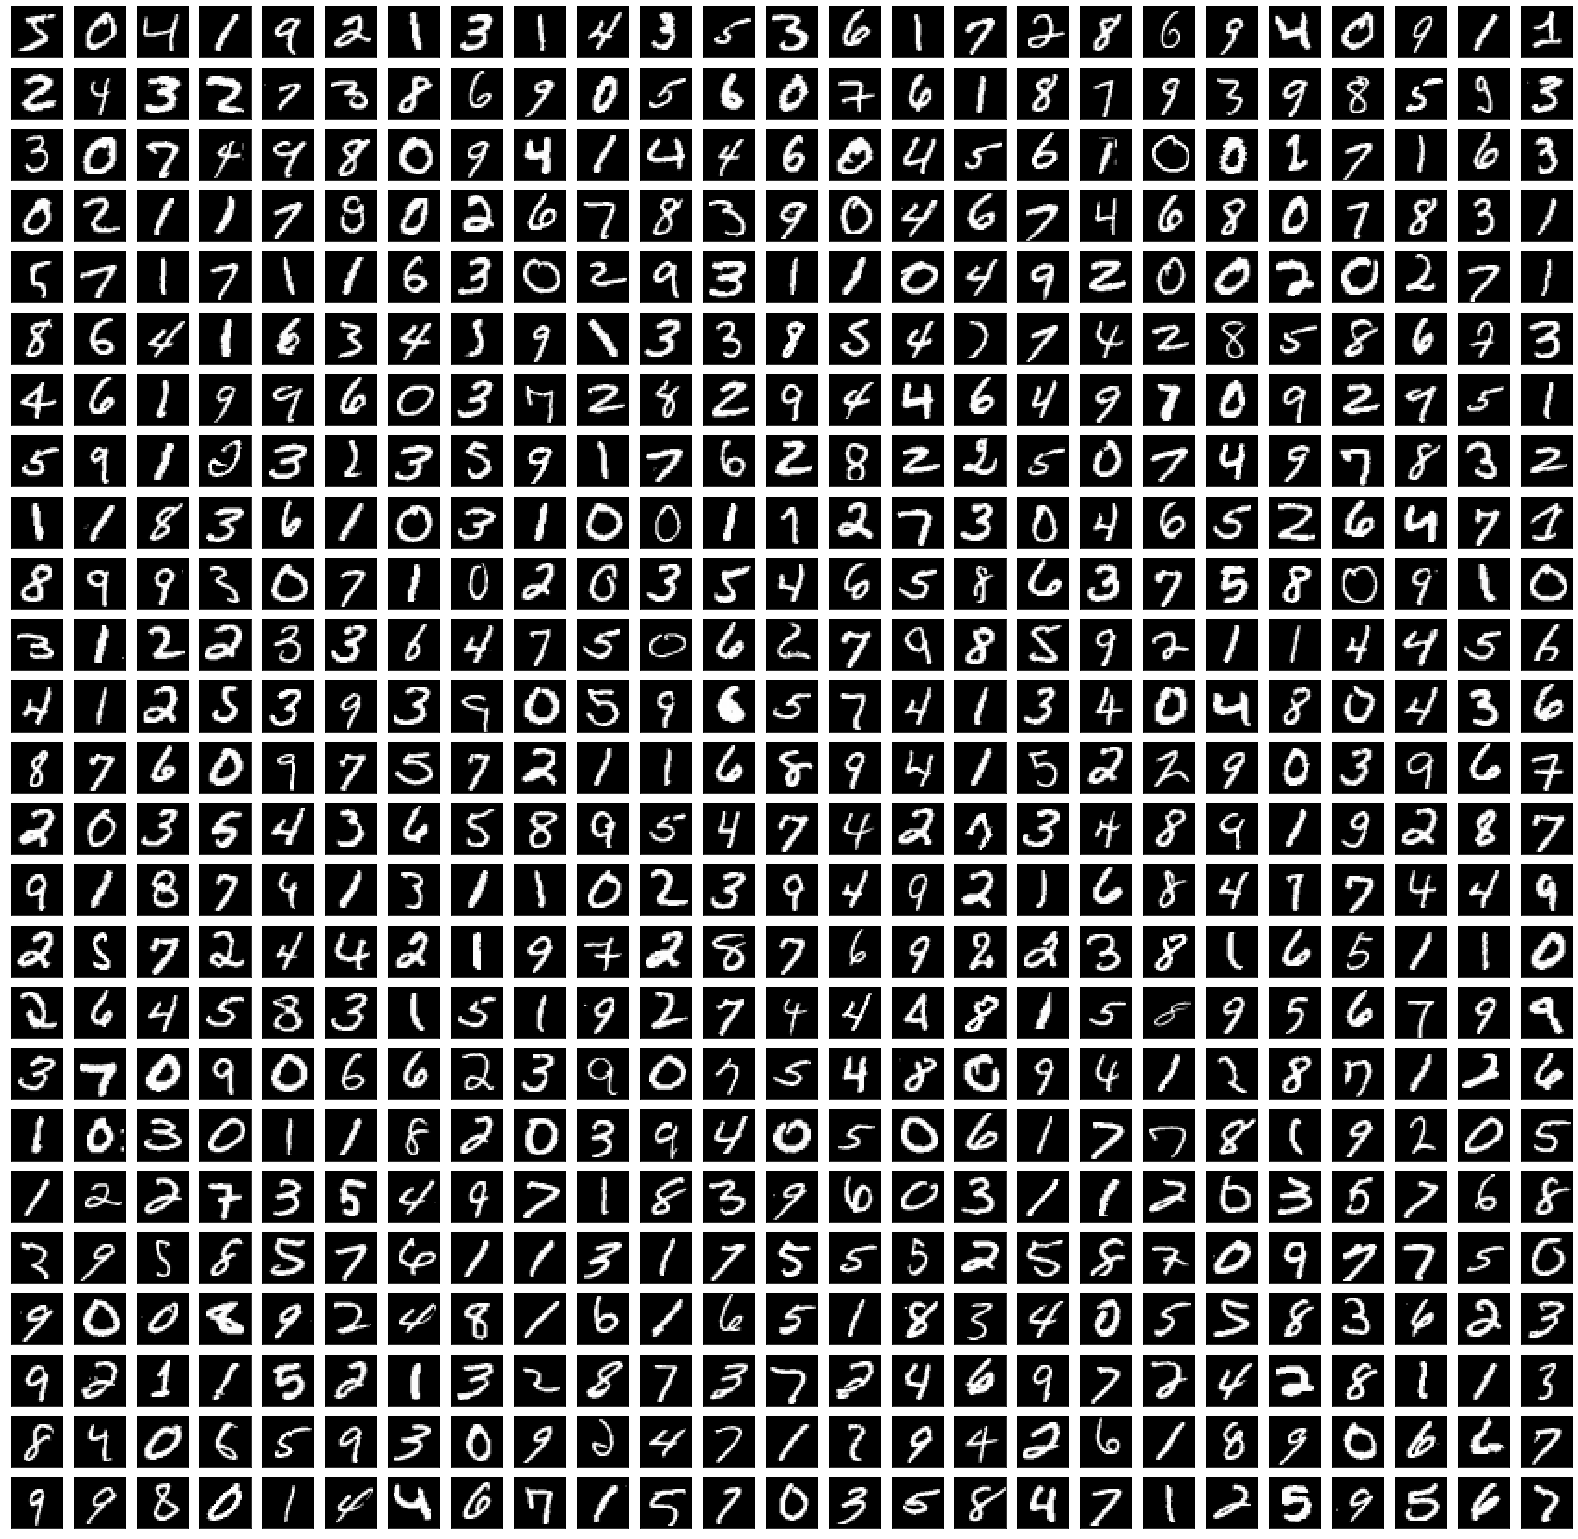

In [4]:
# Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(28,28))
ind = 0
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind+1)
        show(x_train[ind])
        plt.xticks([])
        plt.yticks([])
        ind+=1

## **Parte 1: Arquitetura e treinamento propostos pelo professor:**


### **1.1. Arquitetura proposta:**

In [5]:
INPUT_SHAPE = x_train.shape[1] * x_train.shape [2] # INPUT_SHAPE = 784

# Encoder:
input_img = keras.Input(shape=(INPUT_SHAPE,))

encoded1 = keras.layers.Dense(784, activation='tanh')(input_img)
encoded1 = keras.layers.Dense(512, activation='tanh')(encoded1)
encoded1 = keras.layers.Dense(128, activation='tanh')(encoded1)
encoded1 = keras.layers.Dense(64, activation='tanh')(encoded1)

encoded1 = keras.layers.Dense(2)(encoded1) # Linear activation function at the bottleneck

# Decoder:
decoded1 = keras.layers.Dense(32, activation='tanh')(encoded1)
decoded1 = keras.layers.Dense(128, activation='tanh')(decoded1)
decoded1 = keras.layers.Dense(512, activation='tanh')(decoded1)

decoded1 = keras.layers.Dense(784, activation='sigmoid')(decoded1)

# Autoencoder:
autoencoder1 = keras.Model(inputs=input_img, outputs=decoded1)
autoencoder1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                96    

### **1.2. Treinamento proposto:**

In [6]:
BATCH_SIZE = 128
NUM_EPOCHS = 50

X = x_train.reshape(x_train.shape[0], INPUT_SHAPE)

autoencoder1.compile(optimizer = "adam", loss = "mse")
history1 = autoencoder1.fit(X, X, batch_size = BATCH_SIZE, epochs = NUM_EPOCHS, verbose = 1)

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0620
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0485
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0441
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0417
Epoch 5/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0403
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0393
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0383
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0376
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0371
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0368
Epoch 11/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0367
Epoch 12/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0362
Epoch 13/50
469/469 [====

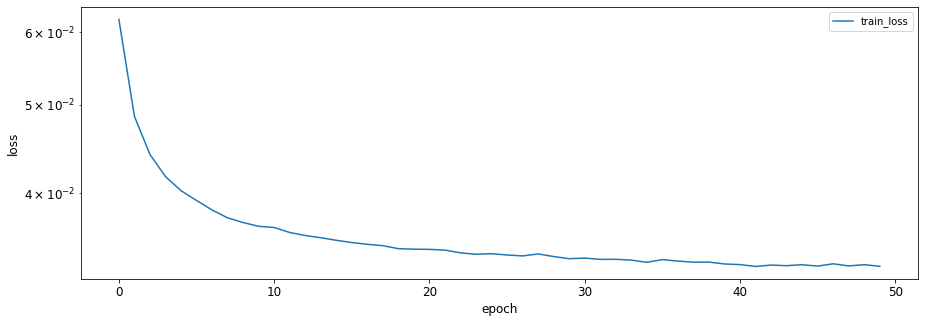

In [7]:
# Gráfico da perda em função do número de épocas:
 
plot_df = pd.DataFrame.from_dict({'train_loss':history1.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

### **1.3. Obtenção do codificador e do decodificador após o treinamento:**

In [8]:
# Encoder:
encoder1 = keras.Model(inputs = input_img, outputs = encoded1)
encoder1.summary()

# Decoder:
encoded_input1 = keras.Input(shape=(2,))
encoded_layer_1 = autoencoder1.layers[-4]
encoded_layer_2 = autoencoder1.layers[-3]
encoded_layer_3 = autoencoder1.layers[-2]
encoded_layer_4 = autoencoder1.layers[-1]

decoder1 = encoded_layer_1(encoded_input1)
decoder1 = encoded_layer_2(decoder1)
decoder1 = encoded_layer_3(decoder1)
decoder1 = encoded_layer_4(decoder1)

decoder1 = keras.Model(inputs=encoded_input1, outputs=decoder1)
decoder1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 1,091,410
Trainable params: 1,091,410
Non-trainable params: 0
_________________________________________________

### **1.4. Visualização do *manifold* de duas dimensões e de imagens de treinamento reconstruídas:**

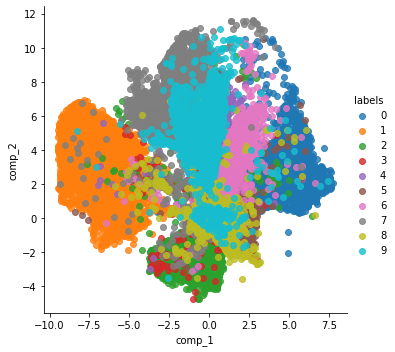

In [9]:
# manifold
x_proj = encoder1.predict(X)

proj = pd.DataFrame(x_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train
sns_plot = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False);

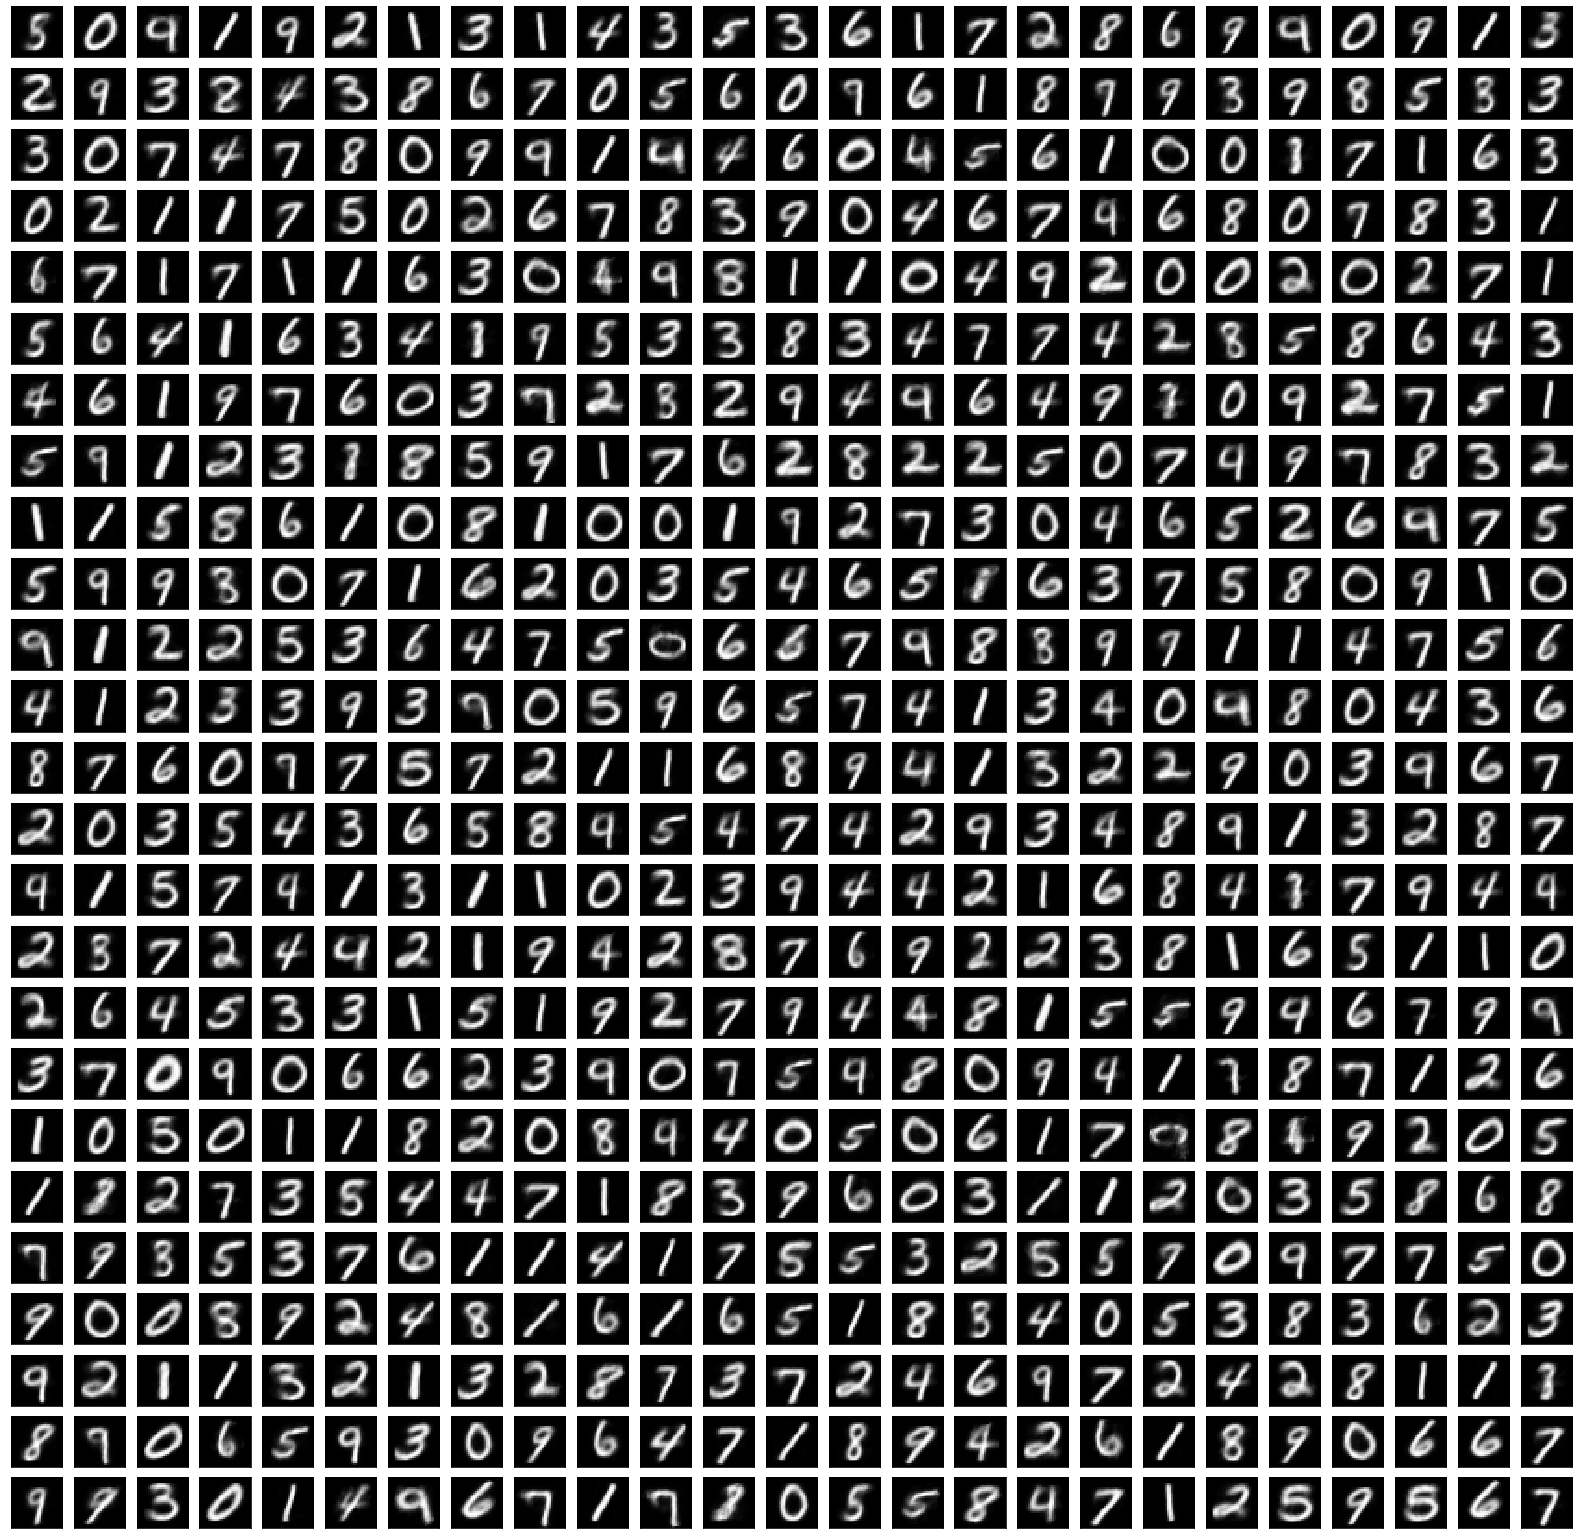

In [10]:
# Visualization of 25 x 25 reconstructed images of digits
x_predict = autoencoder1.predict(X[:25*25])
x_predict = x_predict.reshape(x_predict.shape[0], 28, 28)

fig = plt.figure(figsize=(28,28))
ind = 0
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind+1)
        show(x_predict[ind])
        plt.xticks([])
        plt.yticks([])
        ind+=1

### **1.5. Deslocamento ao longo do *manifold* para geração de novos dígitos :**

In [13]:
# Cálculo do centro da distribuição e das coordenadas máximas e mínimas:
comp1_centroid, comp2_centroid = np.mean(x_proj, axis=0)

1.5.1. Deslocamento ao longo de um círculo:

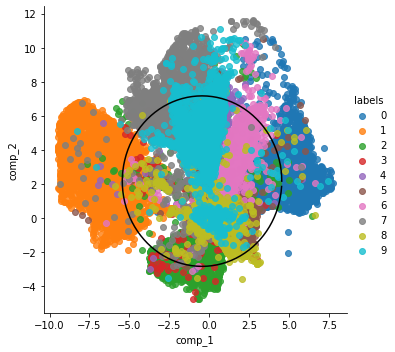

In [15]:
r = 5

_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [r * np.cos(2 * np.pi / 100 * i) + comp1_centroid for i in range(100)]
all_y = [r * np.sin(2 * np.pi / 100 * i) + comp2_centroid for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

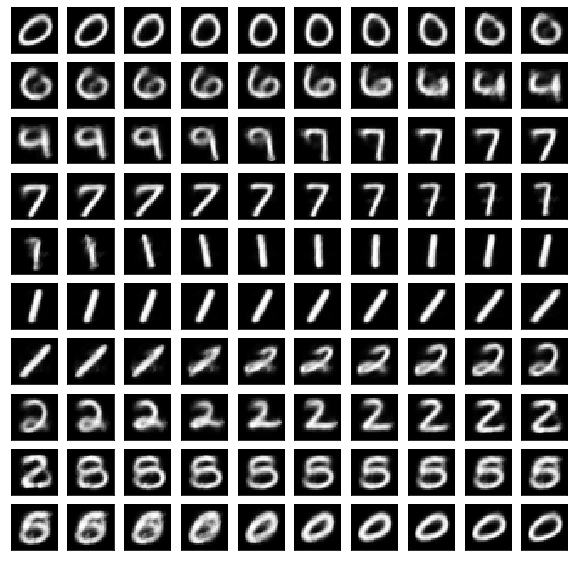

In [16]:
# moving along a circle:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = r * np.cos(2 * np.pi / 100 * i) + comp1_centroid
    y = r * np.sin(2 * np.pi / 100 * i) + comp2_centroid
    
    pt = np.array([[x, y]])
    _ = show(decoder1.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

1.5.2. Deslocamento ao longo de uma elipse:

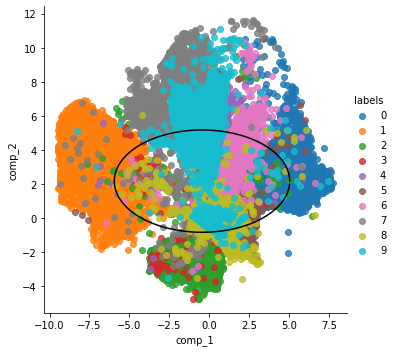

In [18]:
# Raios da elipse:
r1 = 5.5
r2 = 3

_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [r1 * np.cos(2 * np.pi / 100 * i) + comp1_centroid for i in range(100)]
all_y = [r2 * np.sin(2 * np.pi / 100 * i) + comp2_centroid for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

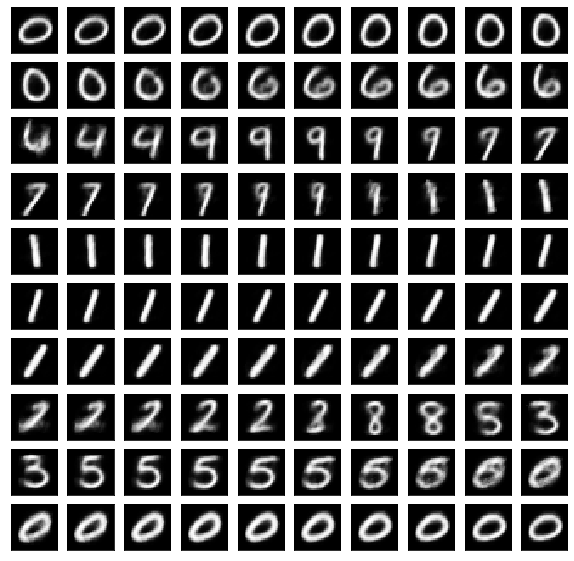

In [19]:
# moving along a elipse:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = r1 * np.cos(2 * np.pi / 100 * i) + comp1_centroid
    y = r2 * np.sin(2 * np.pi / 100 * i) + comp2_centroid
    
    pt = np.array([[x, y]])
    _ = show(decoder1.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

1.5.3. Deslocamento em um grid:

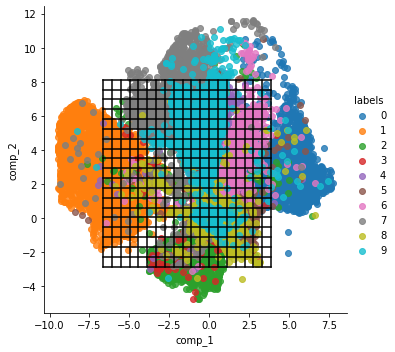

In [22]:
# Escalonamento do grid:
comp1_max, comp2_max = np.max(x_proj, axis=0)
comp1_min, comp2_min = np.min(x_proj, axis=0)

comp1_max, comp2_max = 0.5 * comp1_max, 0.7 * comp2_max
comp1_min, comp2_min = 0.7 * comp1_min, 0.6 * comp2_min


_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)

all_x1 = [comp1_min + (comp1_max - comp1_min) * i / 19 for i in range(20)]
all_y2 = [comp2_min + (comp2_max - comp2_min) * i / 19 for i in range(20)]

for j in range(0, 20):

    all_y1 = [comp2_min + (comp2_max - comp2_min) * j / 19 for k in range(20)]
    all_x2 = [comp1_min + (comp1_max - comp1_min) * j / 19 for k in range(20)]

    plt.plot(all_x1, all_y1, 'black')
    plt.plot(all_x2, all_y2, 'black')

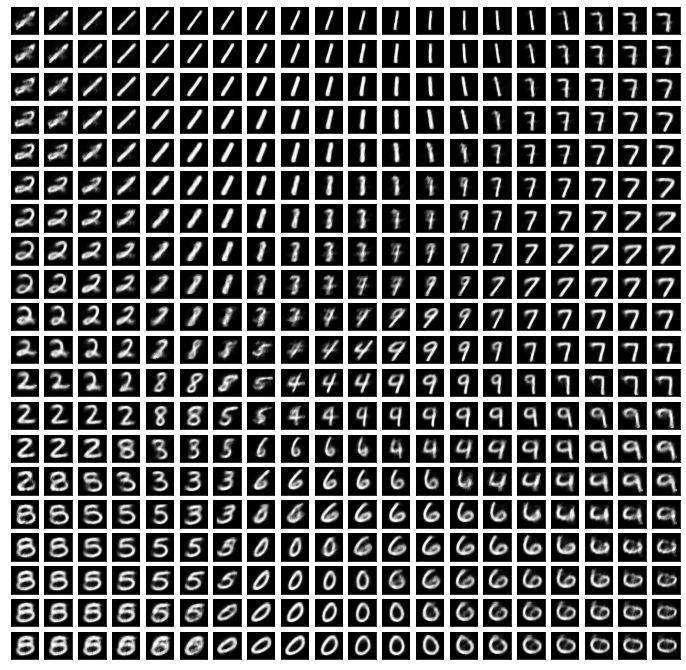

In [23]:
# moving along a grid:
_ = plt.figure(figsize=(12, 12))

for i in range(20):
    for j in range(20):
        
        _ = plt.subplot(20, 20, i * 20 + j + 1)
        
        pt = np.array([[ comp1_min + (comp1_max - comp1_min) * i / 19, comp2_min + (comp2_max - comp2_min) * j / 19]])
        _ = show(decoder1.predict(pt).reshape((28, 28)))
        _ = plt.xticks([])
        _ = plt.yticks([])

## **Parte 2: Proposta de arquitetura e treinamento com desempenho superior:**

### **2.1. Arquitetura do modelo:**

In [46]:
INPUT_SHAPE = x_train.shape[1] * x_train.shape [2] # INPUT_SHAPE = 784
m = 0.2  # slope for negative inputs - LeakyReLU

# Encoder:

input_img = keras.Input(shape=(INPUT_SHAPE,))

encoded2 = keras.layers.Dense(784, kernel_initializer='he_normal')(input_img)
encoded2 = keras.layers.LeakyReLU(m)(encoded2)
encoded2 = keras.layers.Dense(512, kernel_initializer='he_normal')(encoded2)
encoded2 = keras.layers.LeakyReLU(m)(encoded2)
encoded2 = keras.layers.Dropout(0.5)(encoded2)
encoded2 = keras.layers.Dense(256, kernel_initializer='he_normal')(encoded2)
encoded2 = keras.layers.LeakyReLU(m)(encoded2)
encoded2 = keras.layers.Dropout(0.3)(encoded2)
encoded2 = keras.layers.Dense(128, kernel_initializer='he_normal')(encoded2)
encoded2 = keras.layers.LeakyReLU(m)(encoded2)
encoded2 = keras.layers.Dropout(0.1)(encoded2)

encoded2 = keras.layers.Dense(2)(encoded2) # Linear activation function at the bottleneck

# Decoder:
decoded2 = keras.layers.Dense(32, kernel_initializer='he_normal')(encoded2)
decoded2 = keras.layers.LeakyReLU(m)(decoded2)
decoded2 = keras.layers.Dense(128, kernel_initializer='he_normal')(decoded2)
decoded2 = keras.layers.LeakyReLU(m)(decoded2)
decoded2 = keras.layers.Dense(512, kernel_initializer='he_normal')(decoded2)
decoded2 = keras.layers.LeakyReLU(m)(decoded2)

decoded2 = keras.layers.Dense(784, activation='sigmoid')(decoded2)

# Autoencoder:
autoencoder2 = keras.Model(inputs=input_img, outputs=decoded2)
autoencoder2.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_90 (Dense)             (None, 784)               615440    
_________________________________________________________________
leaky_re_lu_63 (LeakyReLU)   (None, 784)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_64 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 256)               131

### **2.2. Treinamento do modelo:**

In [60]:
BATCH_SIZE = 128
NUM_EPOCHS = 200

X = x_train.reshape(x_train.shape[0], INPUT_SHAPE)

autoencoder2.compile(optimizer = "adam", loss = "mse")
history2 = autoencoder2.fit(X, X, batch_size = BATCH_SIZE, epochs = NUM_EPOCHS, verbose = 1)

Epoch 1/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0345
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0345
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0345
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0345
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0345
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0345
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0344
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0344
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0344
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0344
Epoch 11/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0344
Epoch 12/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0344
Epoch 13/50
469/469 [====

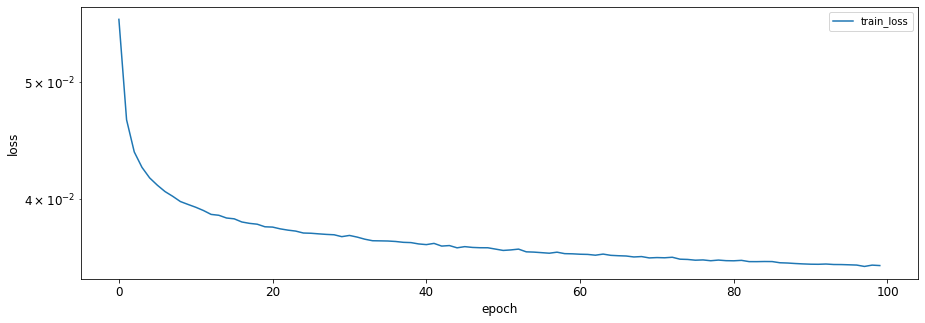

In [714]:
# Gráfico da perda em função do número de épocas:
 
plot_df = pd.DataFrame.from_dict({'train_loss':history2.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

### **2.3. Obtenção do codificador e do decodificador após o treinamento:**

In [61]:
# Encoder:
encoder2 = keras.Model(inputs = input_img, outputs = encoded2)
encoder2.summary()

# Decoder:
encoded_input = keras.Input(shape=(2,))

for i in range(-7, 0):
    encoded_layer = autoencoder2.layers[i]
    if i == -7:
        decoder2 = encoded_layer(encoded_input)
    else:
        decoder2 = encoded_layer(decoder2)


decoder2 = keras.Model(inputs=encoded_input, outputs=decoder2)
decoder2.summary()

Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_90 (Dense)             (None, 784)               615440    
_________________________________________________________________
leaky_re_lu_63 (LeakyReLU)   (None, 784)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_64 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_92 (Dense)             (None, 256)               131

### **2.4. Visualização do manifold de duas dimensões e de imagens de treinamento reconstruídas:**

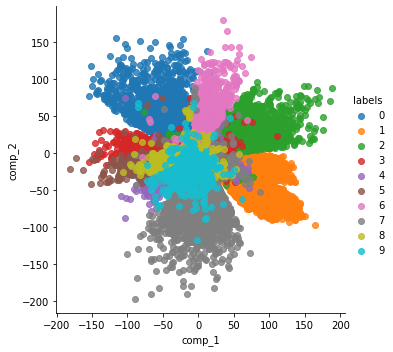

In [62]:
# manifold
x_proj = encoder2.predict(X)

proj = pd.DataFrame(x_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train

sns_plot = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False);

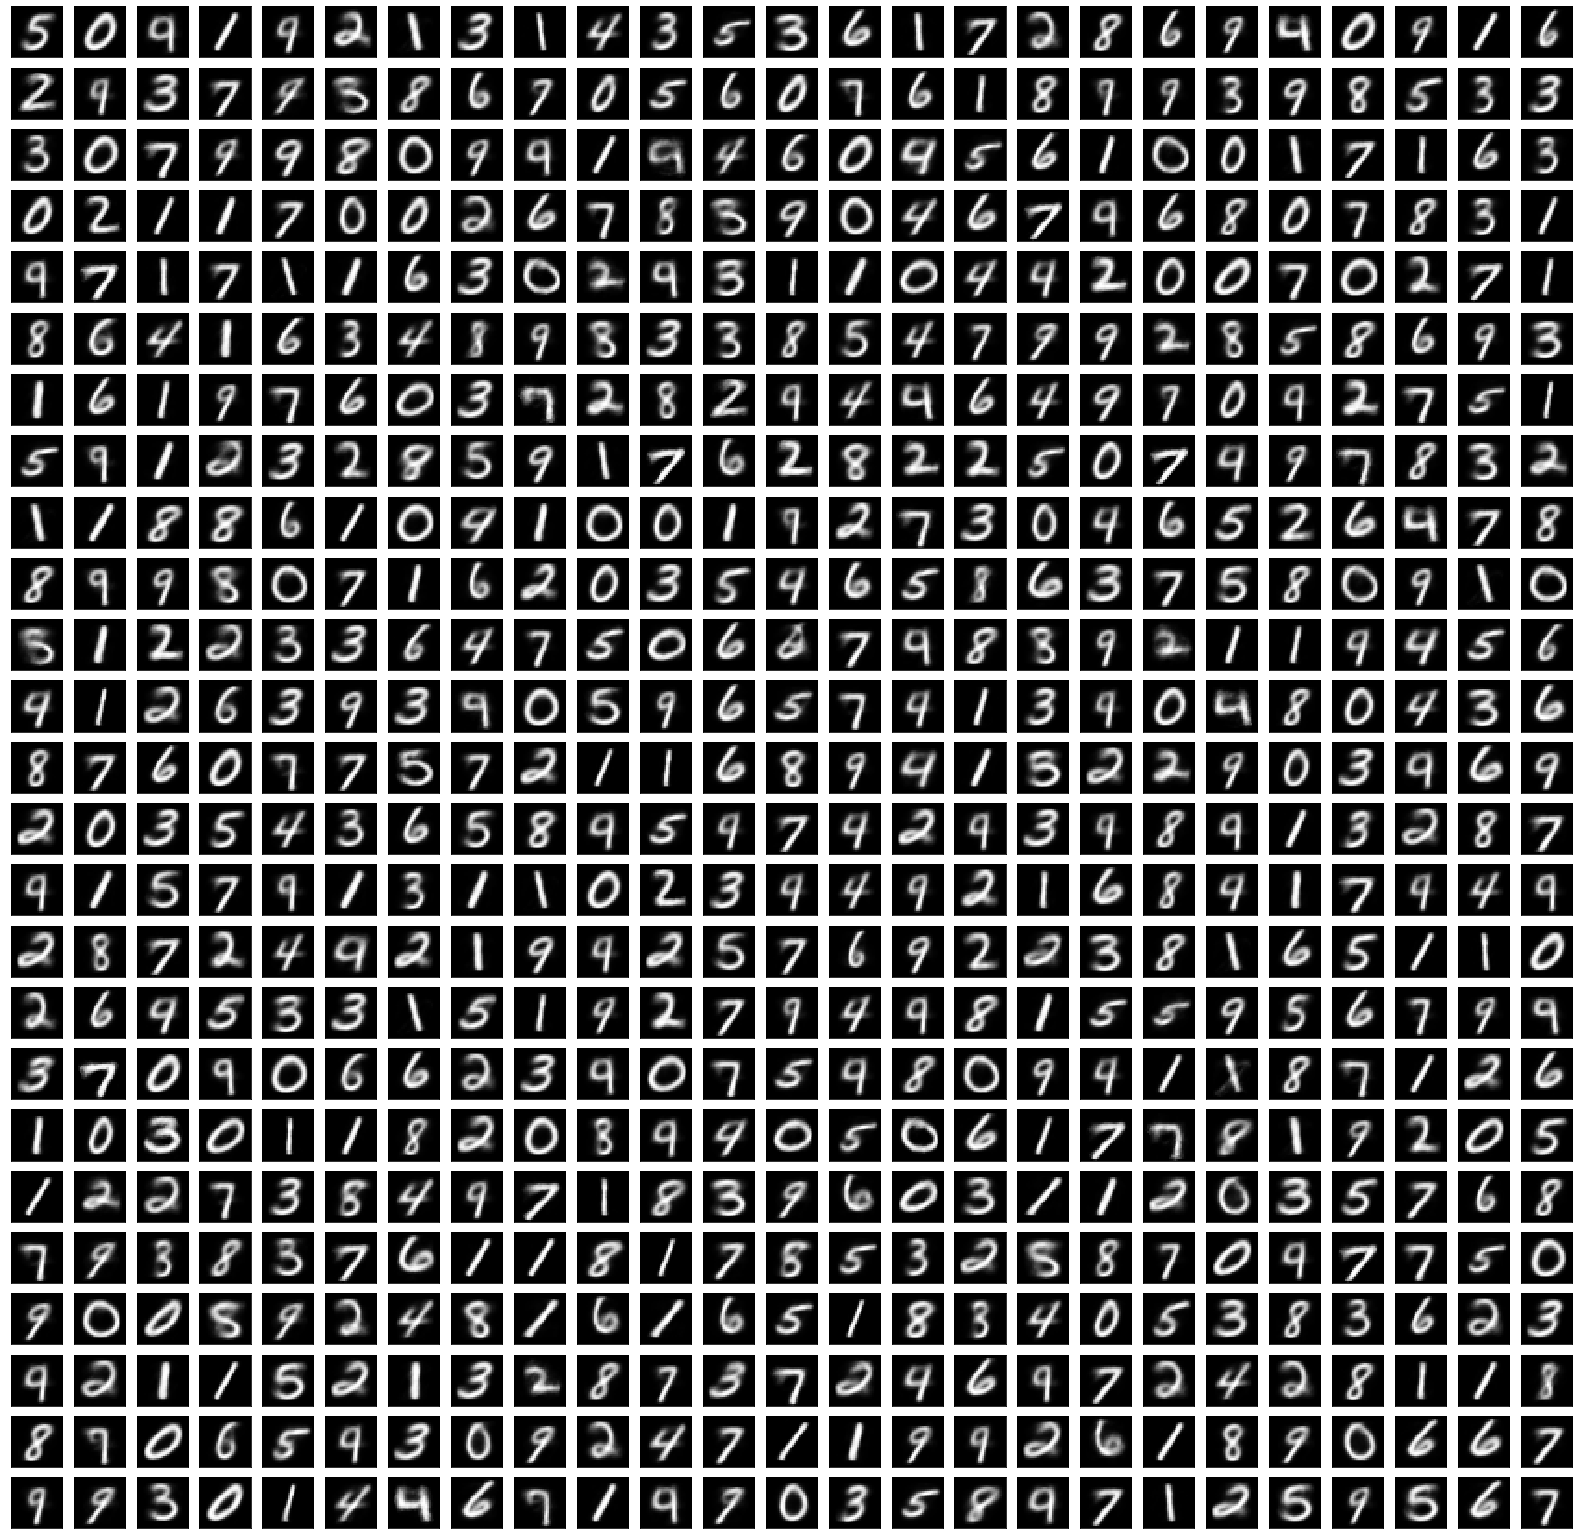

In [78]:
# Visualization of 25 x 25 reconstructed images of digits
x_predict = autoencoder2.predict(X[:25*25])
x_predict = x_predict.reshape(x_predict.shape[0], 28, 28)

fig = plt.figure(figsize=(28,28))
ind = 0
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25, 25, ind+1)
        show(x_predict[ind])
        plt.xticks([])
        plt.yticks([])
        ind+=1

### 5.5. Generating new digits by moving along the manifold (latent 2D space)
**Please, adjust the scale whenever necessary.**

In [63]:
# Cálculo do centro da distribuição e das coordenadas máximas e mínimas:
comp1_centroid, comp2_centroid = np.mean(x_proj, axis=0)

### 5.5.1 Moving along a circle

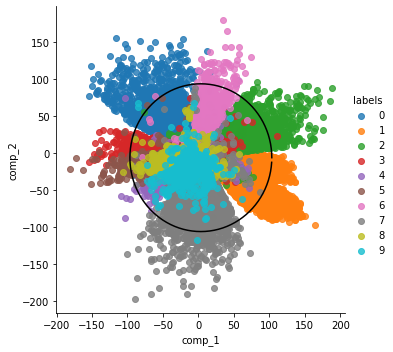

In [64]:
# Raio do círculo:
r = 100

_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [r * np.cos(2 * np.pi / 100 * i) + comp1_centroid for i in range(100)]
all_y = [r * np.sin(2 * np.pi / 100 * i) + comp2_centroid for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

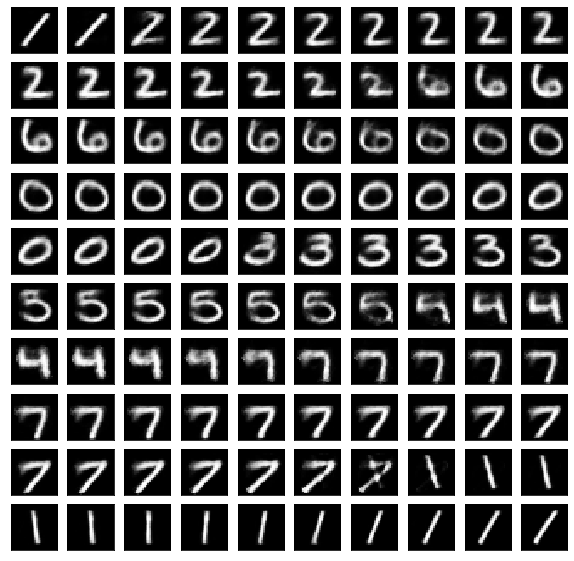

In [65]:
# moving along a circle:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = r * np.cos(2 * np.pi / 100 * i) + comp1_centroid
    y = r * np.sin(2 * np.pi / 100 * i) + comp2_centroid
    
    pt = np.array([[x, y]])
    _ = show(decoder2.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### 5.5.2 Moving along an ellipse

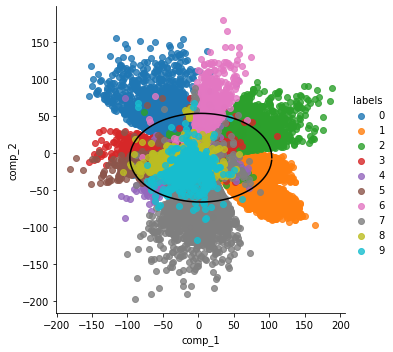

In [67]:
# Raios da elipse:
r1 = 100
r2 = 60

_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [r1 * np.cos(2 * np.pi / 100 * i) + comp1_centroid for i in range(100)]
all_y = [r2 * np.sin(2 * np.pi / 100 * i) + comp2_centroid for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

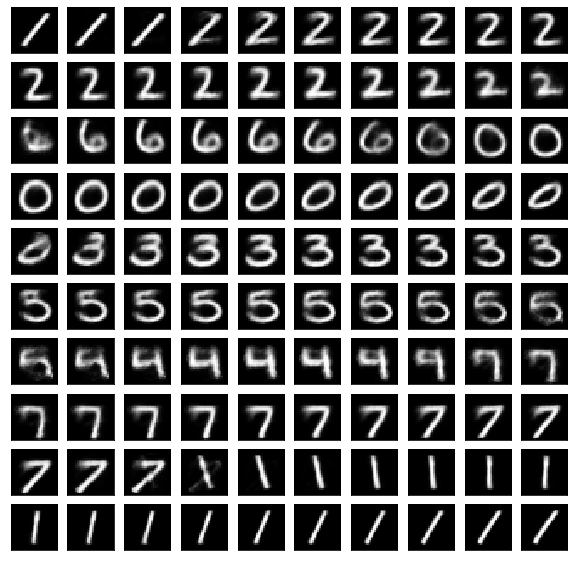

In [68]:
# moving along a elipse:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = r1 * np.cos(2 * np.pi / 100 * i) + comp1_centroid
    y = r2 * np.sin(2 * np.pi / 100 * i) + comp2_centroid
    
    pt = np.array([[x, y]])
    _ = show(decoder2.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### 5.5.3 Moving along a grid

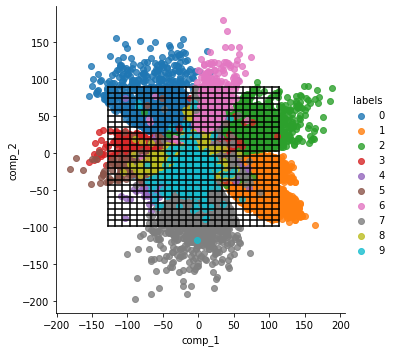

In [76]:
# Escalonamento do grid:
comp1_max, comp2_max = np.max(x_proj, axis=0)
comp1_min, comp2_min = np.min(x_proj, axis=0)

comp1_max, comp2_max = 0.6 * comp1_max, 0.5 * comp2_max
comp1_min, comp2_min = 0.7 * comp1_min, 0.5 * comp2_min

_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)

all_x1 = [comp1_min + (comp1_max - comp1_min) * i / 24 for i in range(25)]
all_y2 = [comp2_min + (comp2_max - comp2_min) * i / 24 for i in range(25)]

for j in range(0, 25):

    all_y1 = [comp2_min + (comp2_max - comp2_min) * j / 24 for k in range(25)]
    all_x2 = [comp1_min + (comp1_max - comp1_min) * j / 24 for k in range(25)]

    plt.plot(all_x1, all_y1, 'black')
    plt.plot(all_x2, all_y2, 'black')

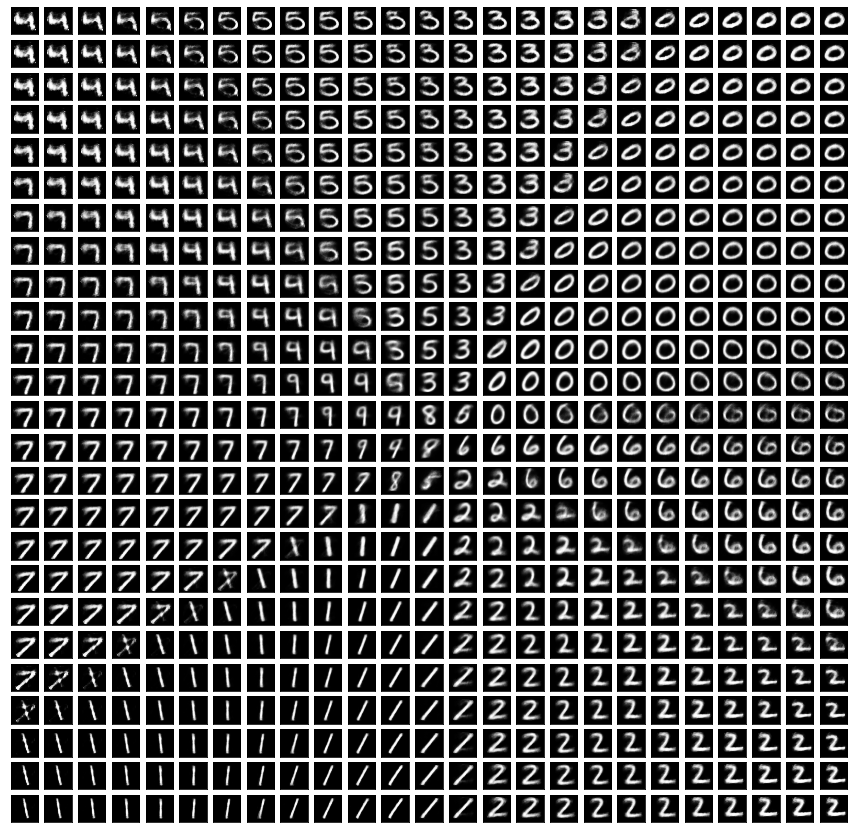

In [77]:
# moving along a grid:
_ = plt.figure(figsize=(15, 15))

for i in range(25):
    for j in range(25):
        
        _ = plt.subplot(25, 25, i * 25 + j + 1)
        
        pt = np.array([[ comp1_min + (comp1_max - comp1_min) * i / 24, comp2_min + (comp2_max - comp2_min) * j / 24]])
        _ = show(decoder2.predict(pt).reshape((28, 28)))
        _ = plt.xticks([])
        _ = plt.yticks([])